# **Implémentation d'un perceptron haut niveau**
# L'objectif est de modéliser un classifieur binaire basé sur un cas d'étude pour autoriser ou non un train d'entrer dans un canton.

# **Partie II**


 > # Codage en utilisant la bibliothèque Tensorflow




In [ ]:
#@title 1 - les données d'apprentissage
import tensorflow.compat.v1 as tf
import numpy as np
tf.disable_eager_execution()

# Création des données d'observations dans une variable de type array
c1_c2 = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])


# Création des données attendues dans une variable de type array
A = np.array([[1], [1], [0], [0]])


In [ ]:
print(c1_c2)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]


In [ ]:
#@title 2 - les variables manifestes


#### Les variables manifestes sont directement observables
#### Nous utilisons le type placeholder de tensorflow pour
#### réserver un espace de stockage en vue d'y recevoir 
#### les observations du perceptron

#Variable TensorFLow correspondant aux valeurs des neurones d'entrée 
"""
tf.placeholder(dtype, shape=None, name=None)
dtype: type of value(s) to be passed into the placeholder
shape: shape of the expected tensor(s)
name: a name for the operation
"""
tf_c1_c2 = tf.placeholder(dtype=tf.float32, shape=[None,2], name="tf_c1_c2")
 
#Variable TensorFlow correspondant au neurone de sortie (prédiction réelle) 
tf_A = tf.placeholder(dtype=tf.float32, shape=[None,1], name="tf_A")

In [ ]:
print(tf_c1_c2)
print(tf_A)

Tensor("tf_c1_c2_13:0", shape=(None, 2), dtype=float32)
Tensor("tf_A_13:0", shape=(None, 1), dtype=float32)


In [ ]:
#@title 3 - les variables latentes

#### Les variables latentes ne sont pas directement observables
#### Elles sont déduites des observations
#### Nous utilisons le type Variable de tensorflow pour
#### réserver un espace de stockage en vue d'y recevoir 
#### les poids du perceptron

#-- Poids -- 
#Création d'une variable TensorFlow de type tableau 
#contenant 3 lignes et dont les valeurs sont de type décimal 
#Ces valeurs sont initialisées au hasard avec la variable random.normal
poids = tf.Variable(tf.random.normal([2, 1]))
 
#-- Biais initialisé à 0 -- 
biais = tf.Variable(tf.zeros([1]))


In [ ]:
#@title 3 - les hyperparamètres

#### Les hyperparamètres décrivent des éléments importants
#### dans la configuration du perceptron en vue de son apprentissage
  
# Taux d'apprentissage 
txApprentissage = 0.1
 
# Nombre d'epochs 
epochs = 10000

In [ ]:
#@title 4 - la configuration du perceptron

#### Pour configurer le perceptron, nous avons besoin 
#### d'un certain nombre de fonctions comme celles d'activation, 
#### de calcul pour la mise à jour des poids, d'erreurs, etc.

#La somme pondérée est en fait une multiplication de matrice 
#entre les valeurs en entrée c1, c2 et les différents poids 
sommeponderee = tf.matmul(tf_c1_c2, poids)
 
#Ajout du biais à la somme pondérée 
sommeponderee = tf.math.add(sommeponderee, biais)
 
#Fonction d'activation de type sigmoïde permettant de calculer 
#la prédiction 
prediction = tf.sigmoid(sommeponderee)
 
#Fonction d'erreur de type reduce_sum permettant de calculer 
# la moyenne quadratique MSE 
fonction_erreur = tf.reduce_sum(tf.square(prediction - tf_A))
 
#Descente de gradient de type GradientDescentOptimizer pour minimiser l'erreur
#avec un taux d'apprentissage fixé à 0.1 dans un premier temps
optimiseur = tf.train.GradientDescentOptimizer(learning_rate=0.1, use_locking=False, name='GradientDescent')
minimisation_erreur=optimiseur.minimize(fonction_erreur)

In [ ]:
#@title 5 - l'apprentissage

#### Pour réaliser cet apprentissage, vous allez devoir effectuer plusieurs 
#### époques pour mettre à jour et optimiser les poids du perceptron.
#### Vous devez pour cela démarrer une session d'apprentissage

#Initialisation des variables 
init = tf.global_variables_initializer() 
 
#Démarrage d'une session d'apprentissage Session de tensorflow
session = tf.Session() 
session.run(init) 
 
#Pour la réalisation du graphique pour la MSE 
Graphique_MSE=[] 
 
 
#Pour chaque epoch 
for i in range(epochs): 

    #Exécuter la session d'apprentissage pour mettre à jour
    #les poids en fonction de l'optimiseur et
    #en "nourissant" les espaces réservés à la prise en compte 
    #des observations.
    #session...
    session.run(minimisation_erreur, feed_dict={tf_c1_c2: c1_c2, tf_A: A})

    #Exécuter la session d'apprentissage pour calculer l'erreur MSE
    #en fonction de la fonction d'erreur et considérant toujours 
    #les observations
    #MSE = session...
    MSE = session.run(fonction_erreur, feed_dict={tf_c1_c2: c1_c2, tf_A: A})


    #Affichage des informations 
    Graphique_MSE.append(MSE) 
    print("EPOCH (" + str(i) + "/" + str(epochs) + ") -  MSE: "+ 
str(MSE)) 


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
EPOCH (5000/10000) -  MSE: 0.0028008881
EPOCH (5001/10000) -  MSE: 0.0028002942
EPOCH (5002/10000) -  MSE: 0.0027996998
EPOCH (5003/10000) -  MSE: 0.0027991089
EPOCH (5004/10000) -  MSE: 0.0027985144
EPOCH (5005/10000) -  MSE: 0.0027979214
EPOCH (5006/10000) -  MSE: 0.002797328
EPOCH (5007/10000) -  MSE: 0.0027967354
EPOCH (5008/10000) -  MSE: 0.0027961456
EPOCH (5009/10000) -  MSE: 0.0027955528
EPOCH (5010/10000) -  MSE: 0.0027949628
EPOCH (5011/10000) -  MSE: 0.0027943698
EPOCH (5012/10000) -  MSE: 0.00279378
EPOCH (5013/10000) -  MSE: 0.0027931873
EPOCH (5014/10000) -  MSE: 0.0027925977
EPOCH (5015/10000) -  MSE: 0.0027920064
EPOCH (5016/10000) -  MSE: 0.0027914178
EPOCH (5017/10000) -  MSE: 0.0027908261
EPOCH (5018/10000) -  MSE: 0.002790238
EPOCH (5019/10000) -  MSE: 0.002789647
EPOCH (5020/10000) -  MSE: 0.0027890622
EPOCH (5021/10000) -  MSE: 0.0027884736
EPOCH (5022/10000) -  MSE: 0.002787882
EPOCH (5

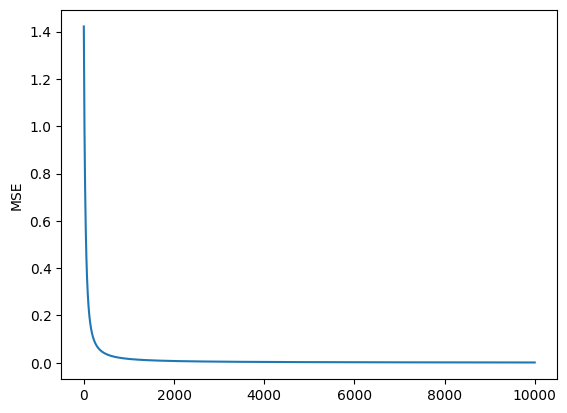

In [ ]:
#@title 6 - monitoring

#### Les données qui ont été stockées pendant l'apprentissage sur la fonction
#### de perte vont être affichées pour être analysées

import matplotlib.pyplot as plt 
plt.plot(Graphique_MSE) 
plt.ylabel('MSE') 
plt.show()

# Recommencer l'apprentissage en modifiant largement l'hyper paramètre epoch
# et monitorer les résultats pour comparer

In [ ]:
#@title 7 - la prédiction

#### Vérification du bon comportement du perceptron

print("--- VERIFICATIONS ----") 
 
for i in range(len(c1_c2)):
  observation = c1_c2[i]
  attendu = A[i]
  prediction_ = session.run(prediction, feed_dict={tf_c1_c2: [observation]} )
  print("Observation: "+str(observation)+ " - Attendu: "+str(attendu)+" - Prediction: "+str(prediction_))

# Constatez le résultat obtenu et recommencez avec une nouvelle prédiction

--- VERIFICATIONS ----
Observation: [0 0] - Attendu: [1] - Prediction: [[0.97782576]]
Observation: [0 1] - Attendu: [1] - Prediction: [[0.98204863]]
Observation: [1 0] - Attendu: [0] - Prediction: [[0.01459737]]
Observation: [1 1] - Attendu: [0] - Prediction: [[0.01804573]]
